### Objective:
    The objective of this assignment is to introduce to various clustering algorithms, including K-Means, hierarchical, and DBSCAN, and provide hands-on experience in applying these techniques to a real-world dataset.


In [2]:
# importing librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# reading the data
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### Data Preprocessing:

In [4]:
#checking for nulls
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

#### EDA

In [5]:
data.shape

(3999, 12)

In [6]:
data.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [7]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
data.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


#### Data Visualization:

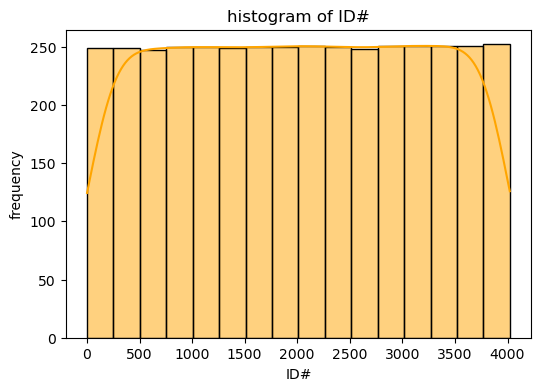

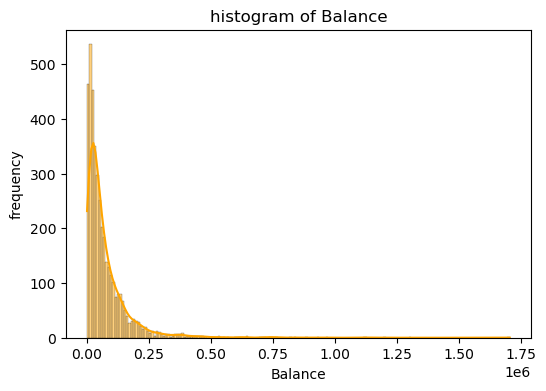

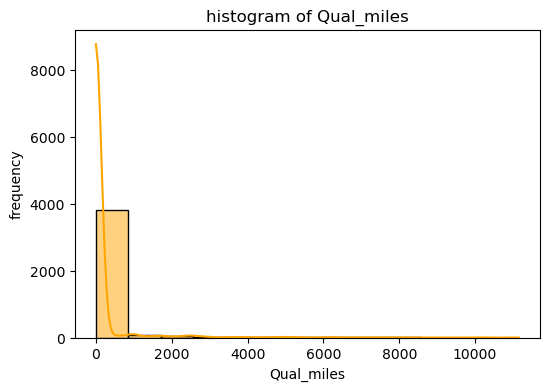

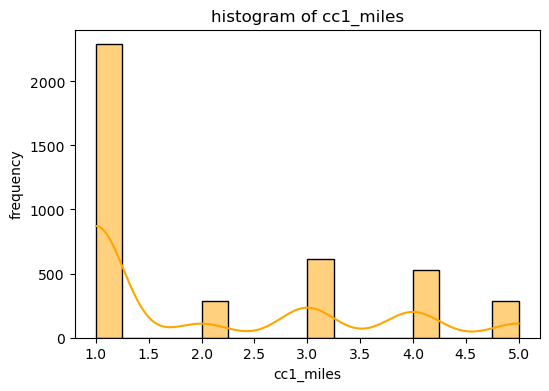

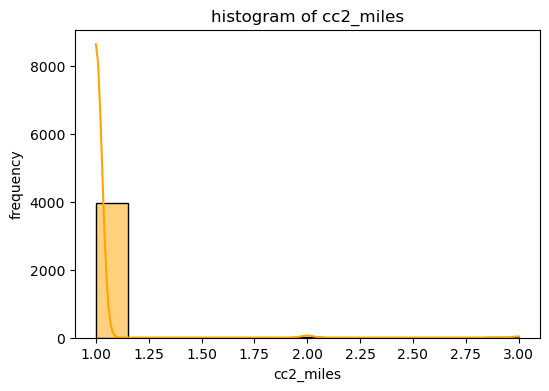

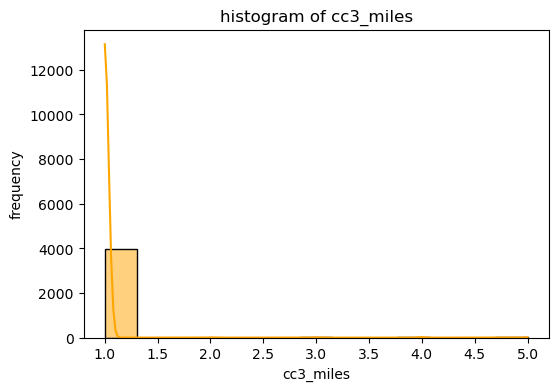

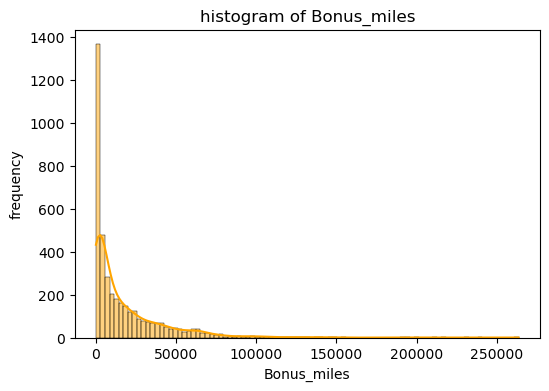

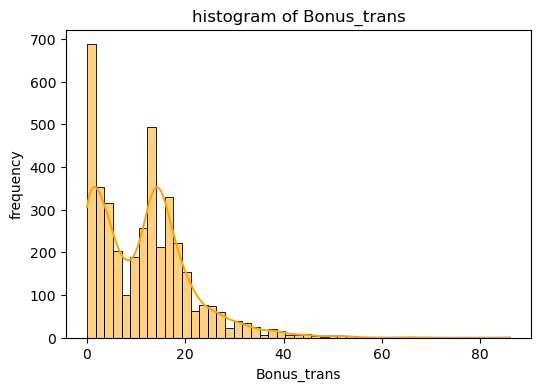

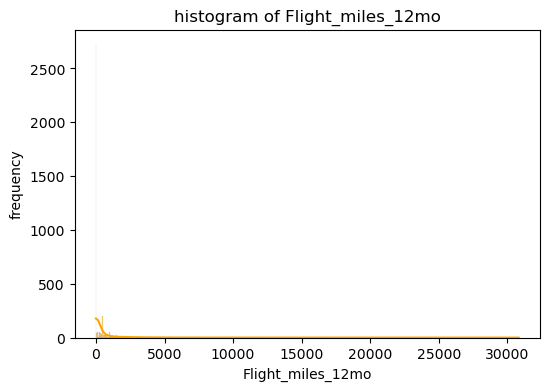

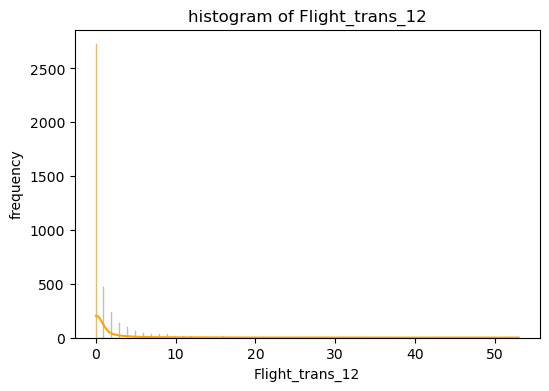

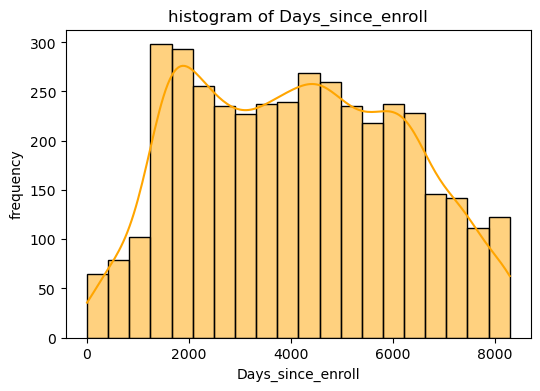

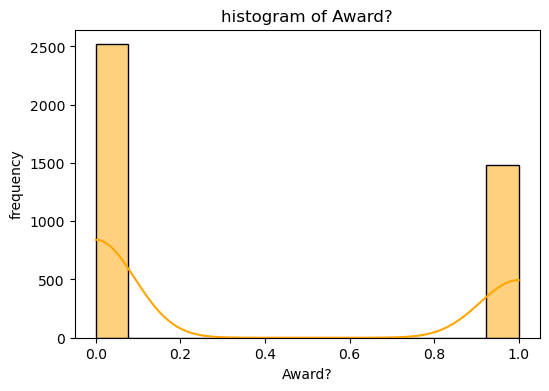

In [10]:
#creating histogram
for col in data.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col],kde=True,color='orange',edgecolor='black')
    plt.title(f'histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.show()

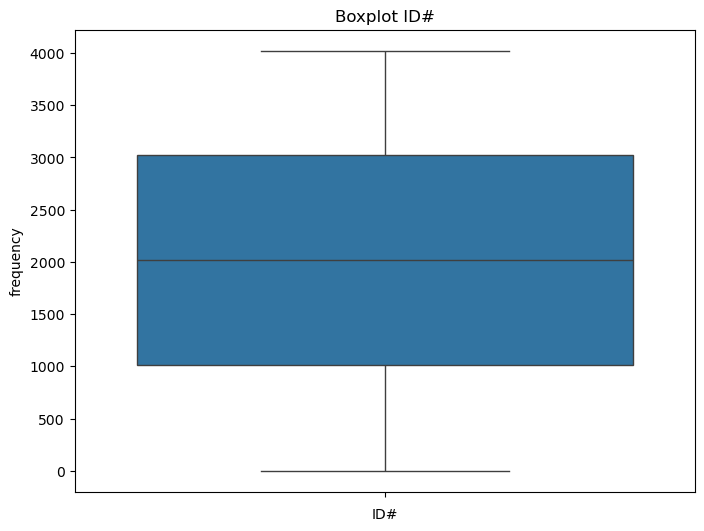

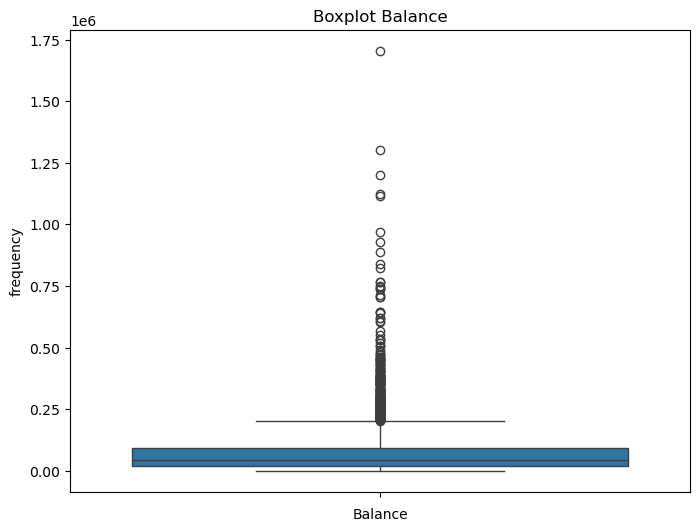

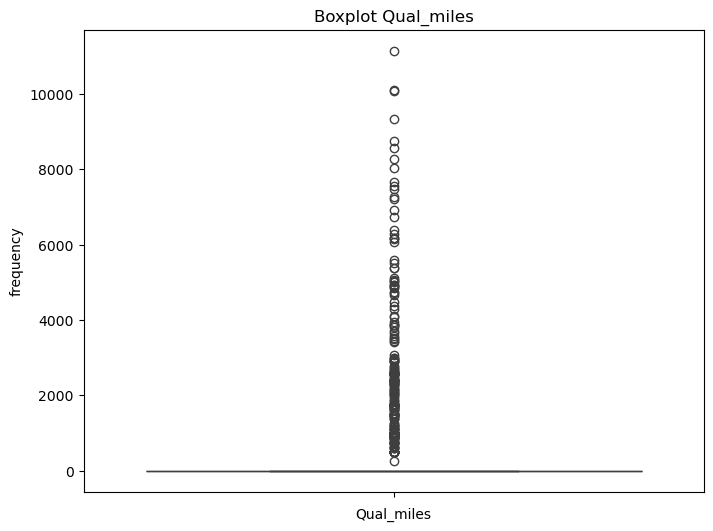

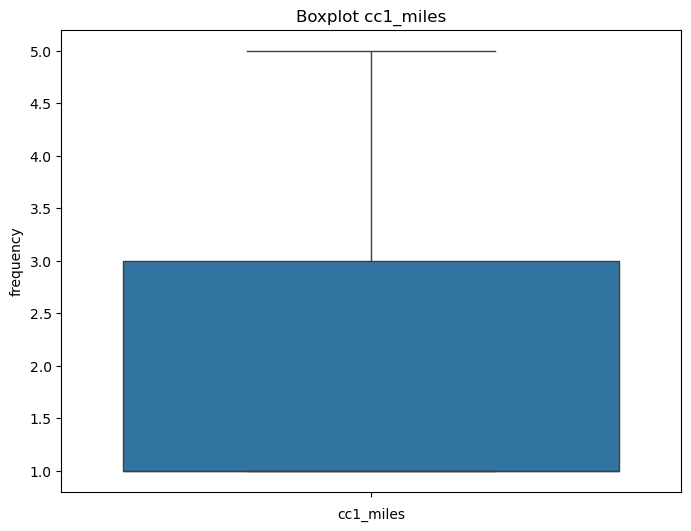

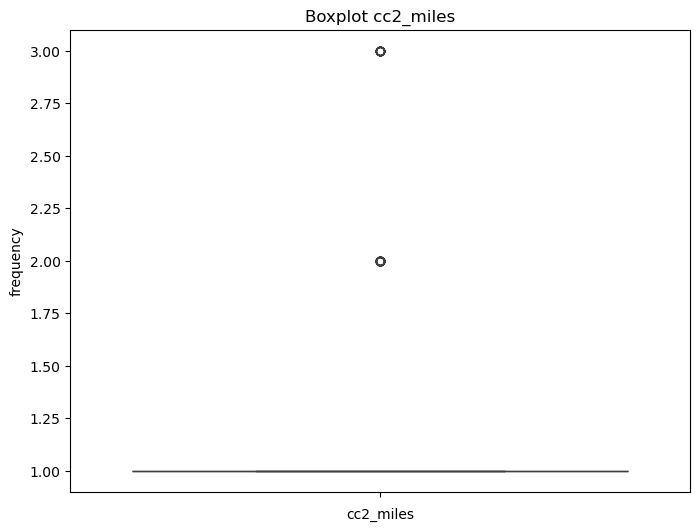

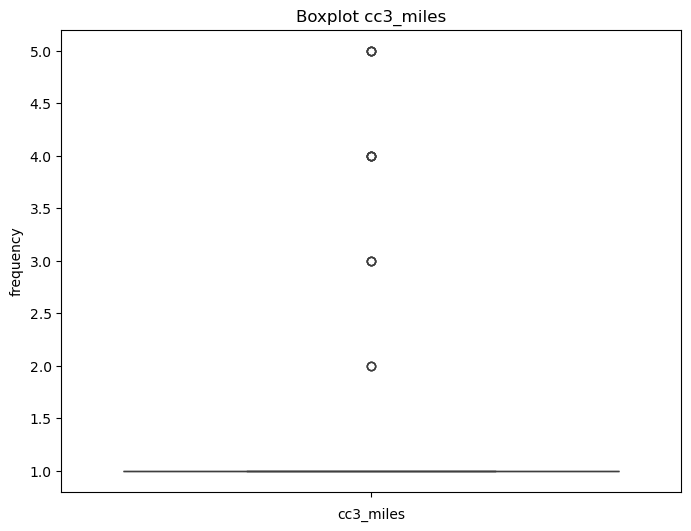

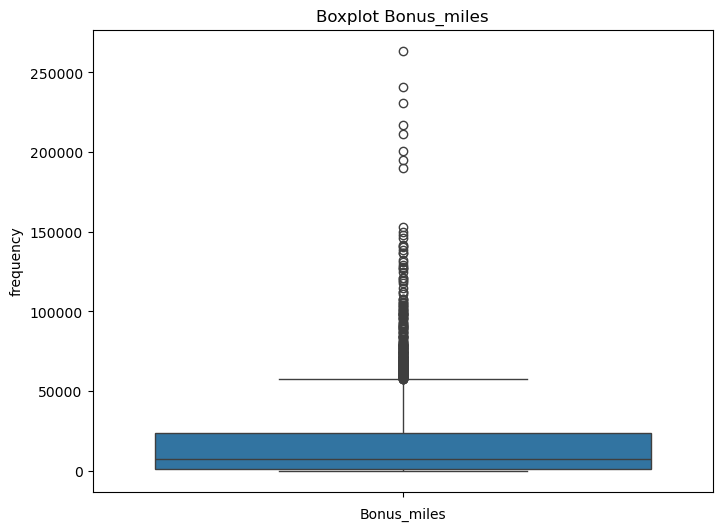

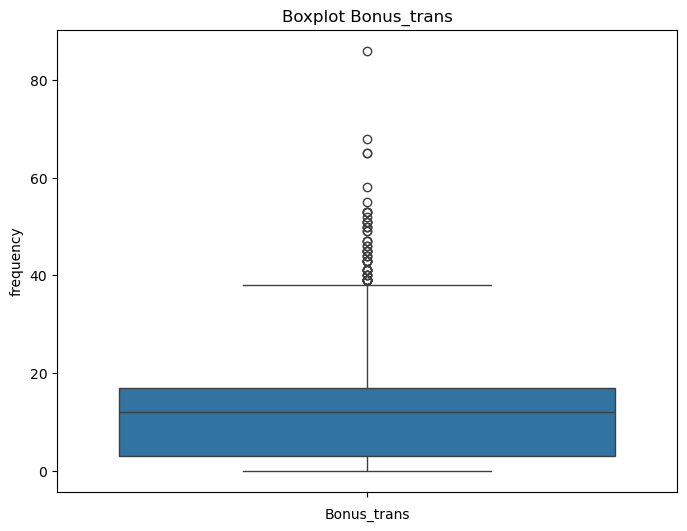

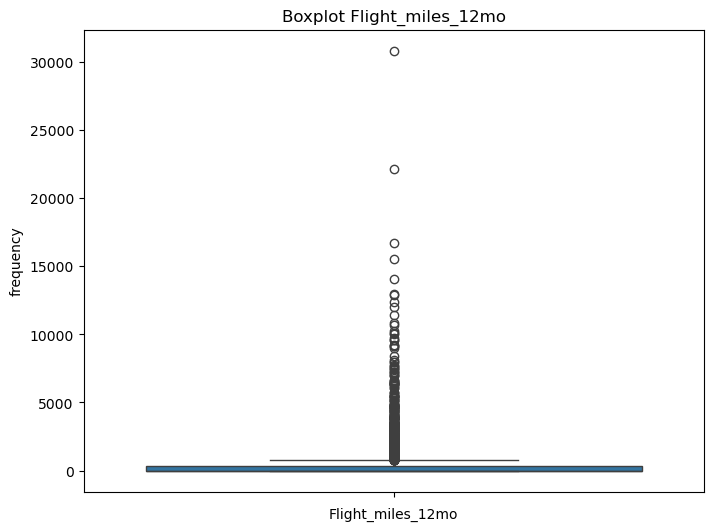

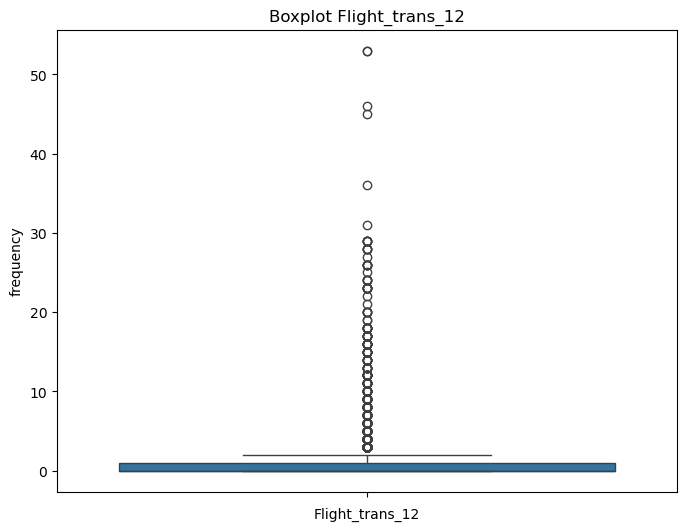

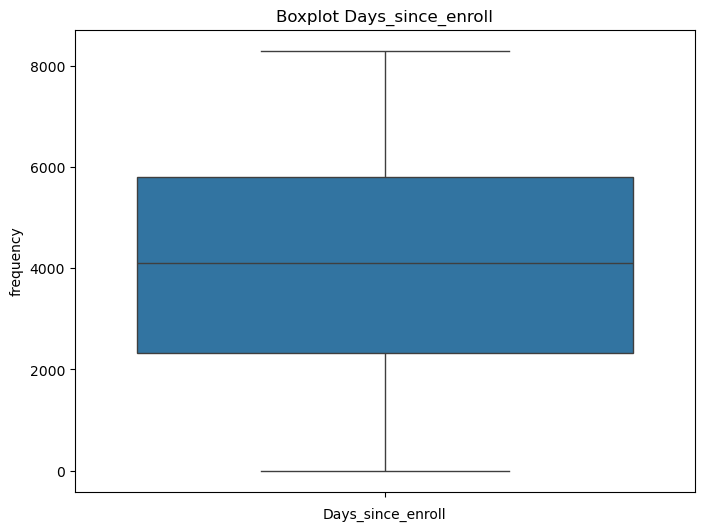

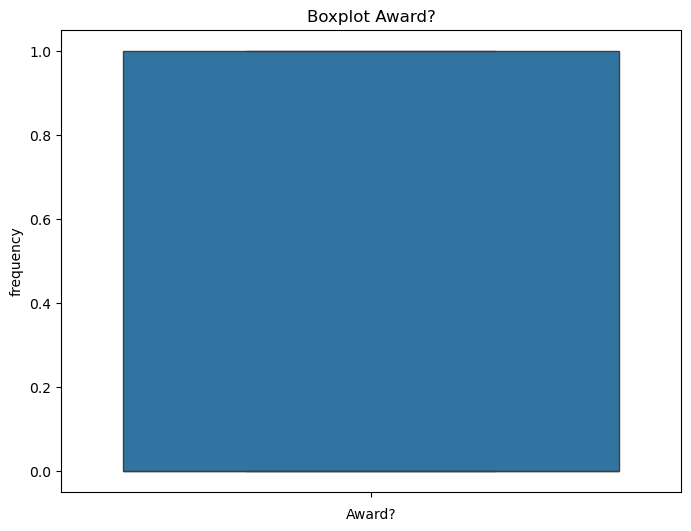

In [15]:
#boxplot
for col in data.columns:
    plt.figure(figsize=(8,6))
    sns.boxplot(data[col])
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.xticks(rotation=45)
    plt.show()

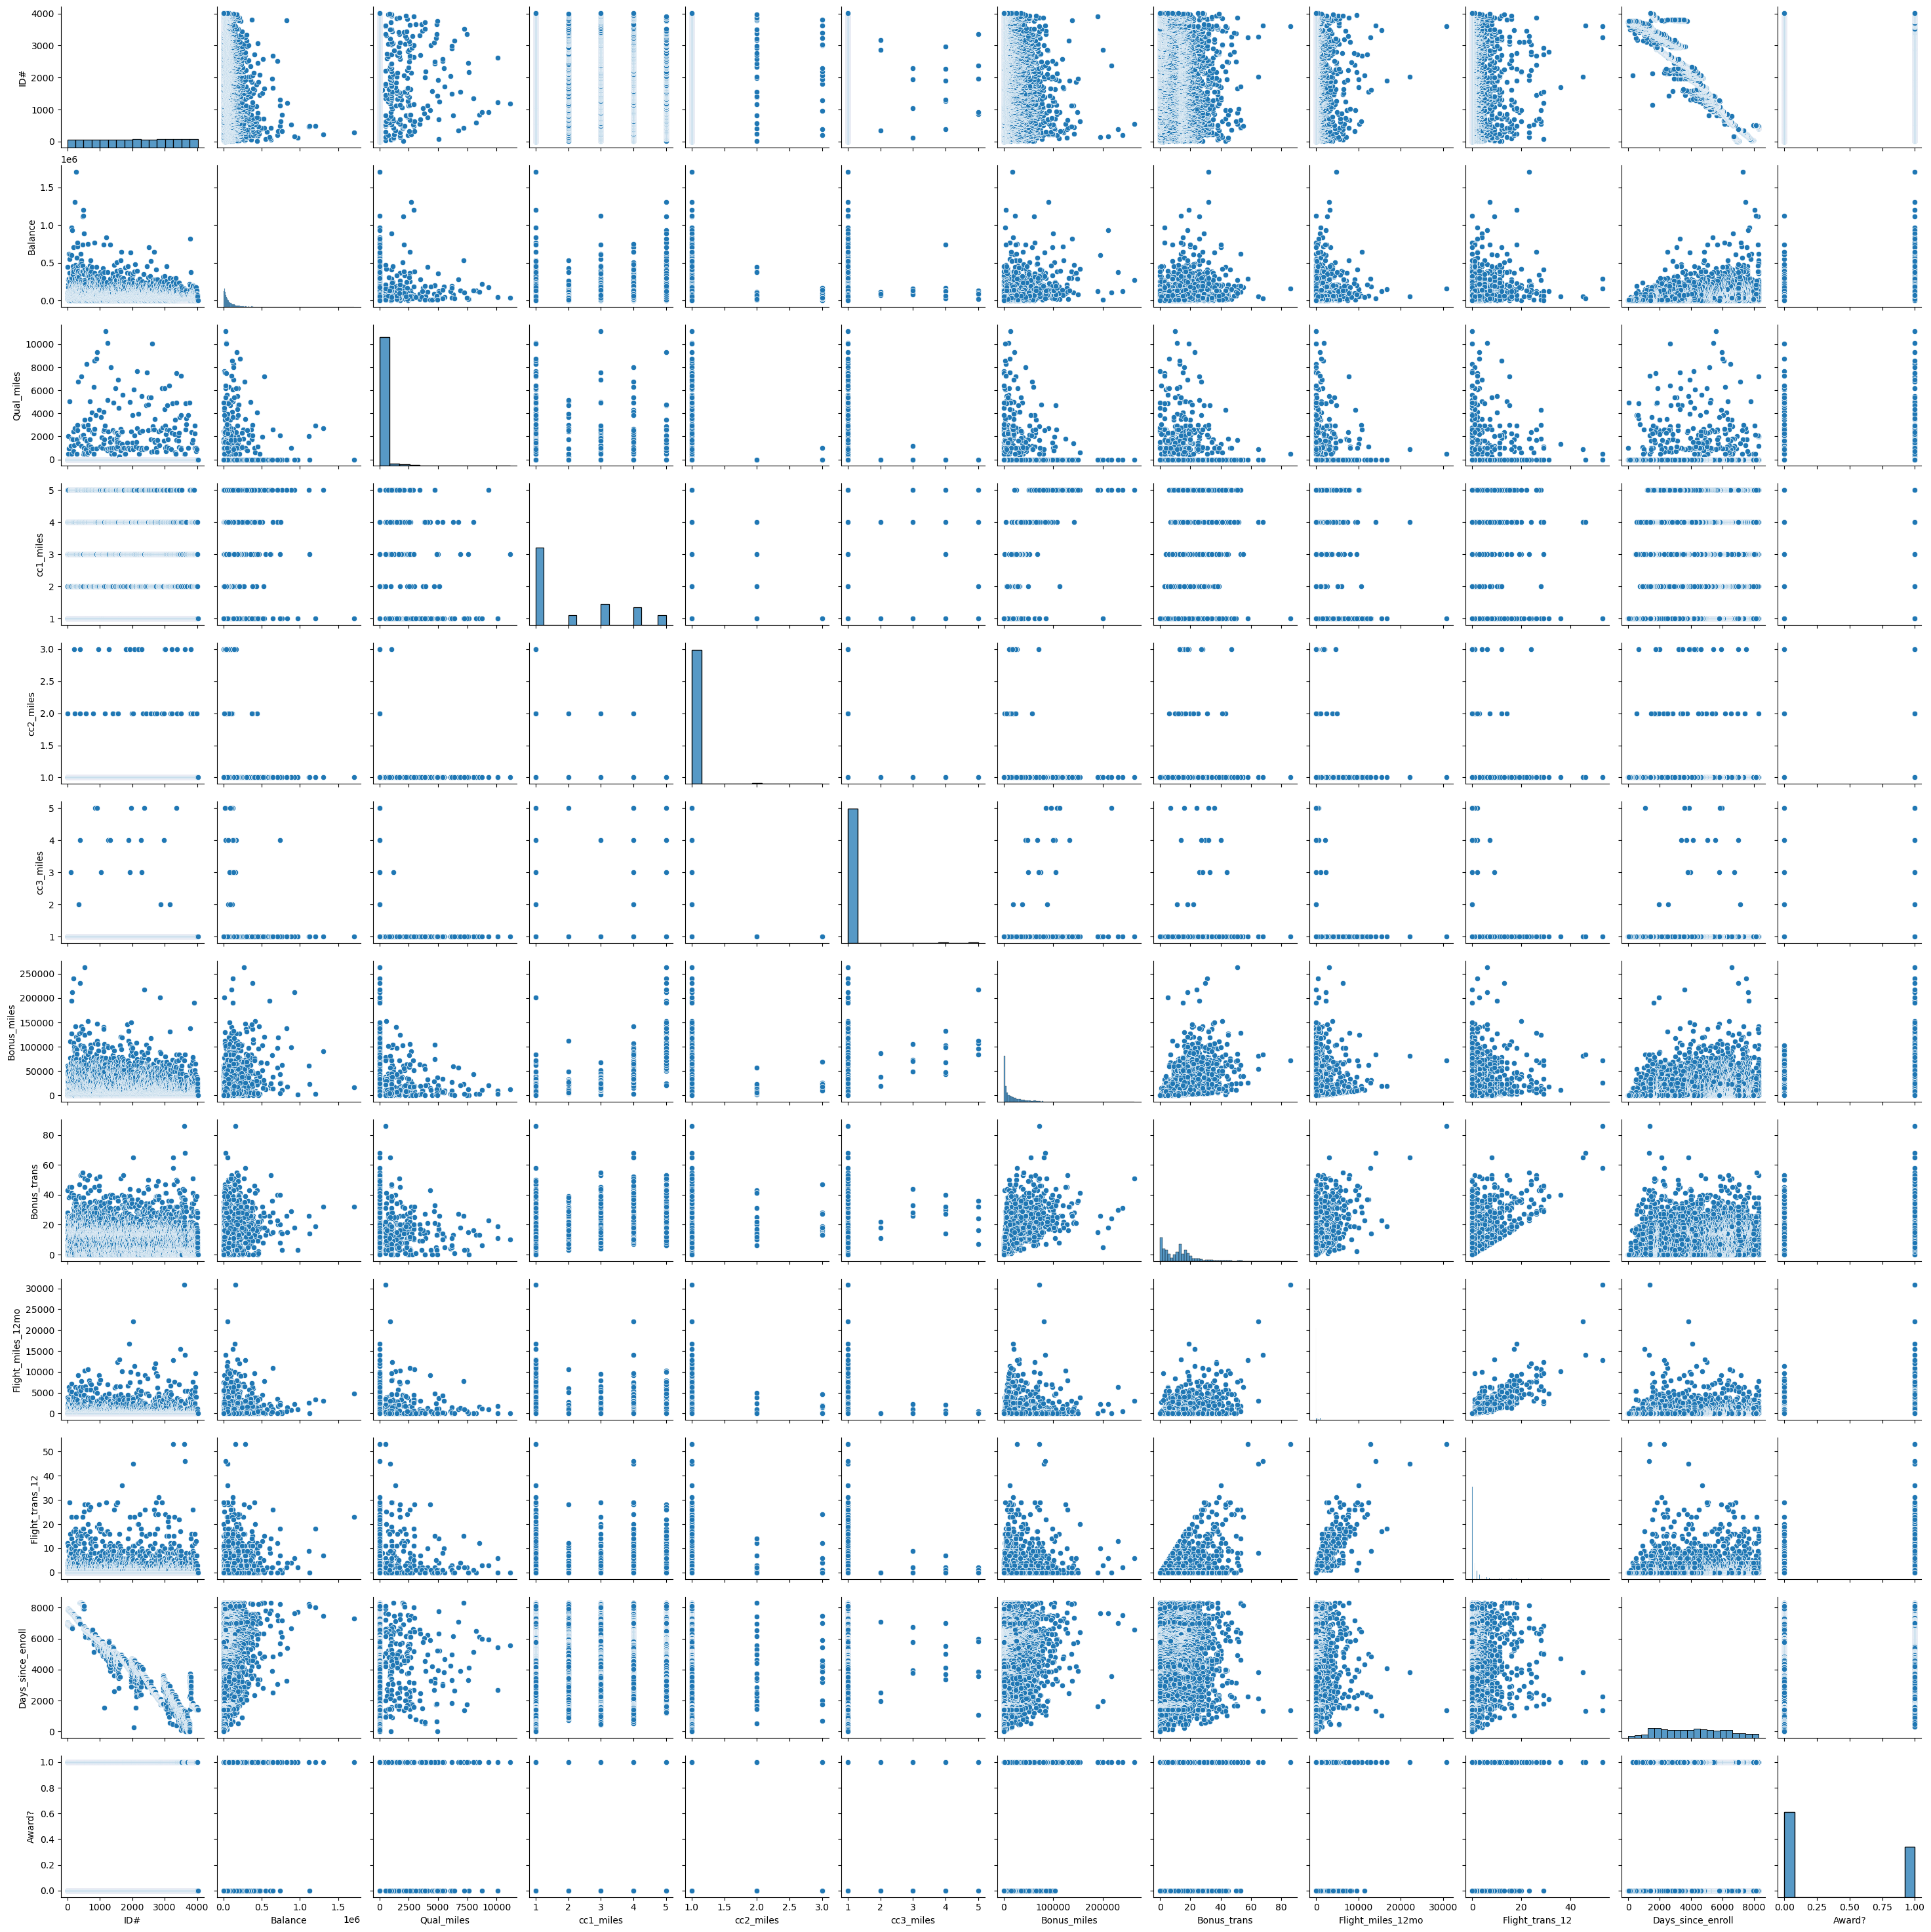

In [12]:
#pairplot
sns.pairplot(data)
plt.show()

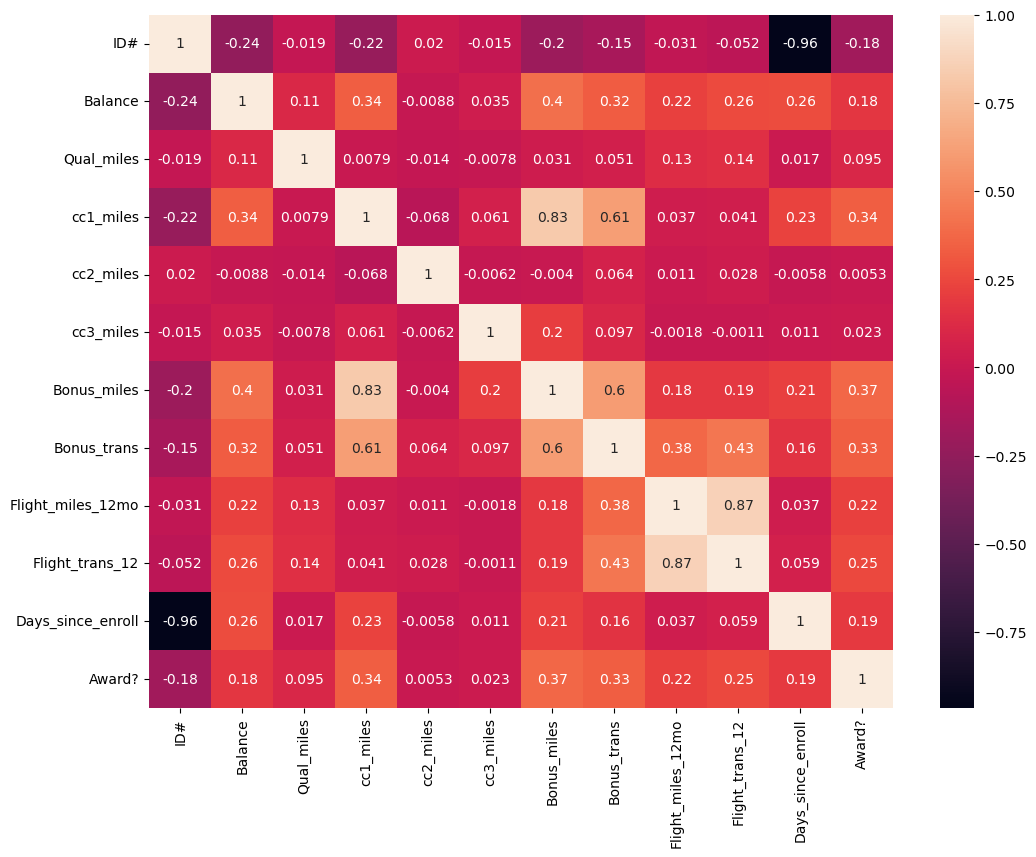

In [11]:
#correlation heatmap
plt.figure(figsize=(12,9))
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

### Implementing Clustering Algorithms:

#### K-Means

In [16]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
from sklearn.metrics import silhouette_score

In [17]:
# Elbow curve 

intertia = []
k_values = range(1,10)

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(data)
    intertia.append(kmeans.inertia_)

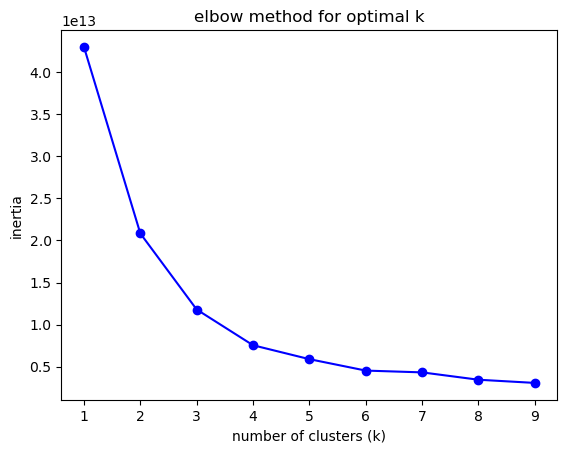

In [18]:
plt.plot(k_values,intertia,'bo-')
plt.xlabel('number of clusters (k)')
plt.ylabel('inertia')
plt.title('elbow method for optimal k')
plt.show()

In [19]:
# applying KMeans

kmeans = KMeans(n_clusters=3,random_state=42)
kmeans_labels = kmeans.fit_predict(data)

print('silhouette score (k-means):',silhouette_score(data,kmeans_labels))

silhouette score (k-means): 0.6493060301677293


#### Hierarchical Clustering 

In [20]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [21]:
# dendrogram

linked = linkage(data,method='ward')

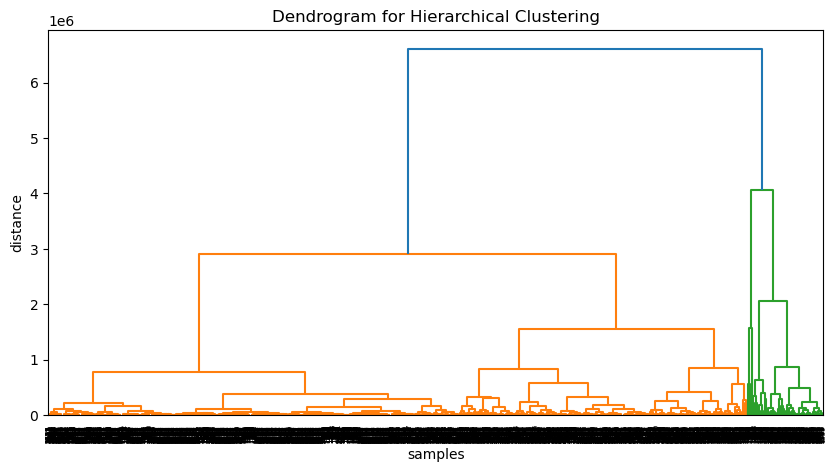

In [22]:
plt.figure(figsize=(10,5))
dendrogram(linked)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('samples')
plt.ylabel('distance')
plt.show()

In [23]:
# applying hierarchical clustering

hierarchical = AgglomerativeClustering(n_clusters=3,linkage='ward')
hier_labels = hierarchical.fit_predict(data)

print('Silhouette score (Hierarchical):',silhouette_score(data,hier_labels))

Silhouette score (Hierarchical): 0.698837066000109


#### DBSCAN 

In [24]:
# epsilon

dbscan = DBSCAN(eps=0.5,min_samples=5)
dbscan_labels = dbscan.fit_predict(data)

In [25]:
# applying DBSCAN

n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print('DBSCAN cluster:',n_clusters)

if n_clusters > 1:
    score = silhouette_score(data,dbscan_labels)
    print('silhouette score (DBSCAN):',score)
else:
    print('Silhouette score not applicables (only one cluster found)')

DBSCAN cluster: 0
Silhouette score not applicables (only one cluster found)


#### Cluster Analysis and Interpretation:

In [26]:
data['KMeans_Cluster'] = kmeans_labels
data['Hierarchical_Cluster'] = hier_labels
data['DBSCAN_Cluster'] = dbscan_labels

In [27]:
# mean

# kmeans clusters
print(data.groupby('KMeans_Cluster').mean(numeric_only=True))

# hierarchical clusters
print(data.groupby('Hierarchical_Cluster').mean(numeric_only=True))


# dbscan clusters
print(data[data['DBSCAN_Cluster'] != -1].groupby('DBSCAN_Cluster').mean(numeric_only=True))

                        ID#        Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                                 
0               1519.353607  188000.250354  285.322489   3.055163   1.009901   
1               2139.382480   39462.146823  106.846700   1.825416   1.015423   
2                944.040000  669585.040000  563.880000   3.160000   1.020000   

                cc3_miles   Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                            
0                1.029703  36035.135785    17.650636         997.294201   
1                1.007711  12512.203578    10.148365         324.614744   
2                1.060000  50416.700000    20.320000        1645.500000   

                Flight_trans_12  Days_since_enroll    Award?  \
KMeans_Cluster                                                 
0                      2.878359        5032.983027  0.504950   
1                      0.979642

In [28]:
# count

# kmeans cluster
print('KMeans cluster counts:')
print(data['KMeans_Cluster'].value_counts())

# hierarchical cluster
print('Hierarchical cluster counts:')
print(data['Hierarchical_Cluster'].value_counts())

# dbscan cluster
print('DBSCAN cluster counts:')
print(data['DBSCAN_Cluster'].value_counts())

KMeans cluster counts:
KMeans_Cluster
1    3242
0     707
2      50
Name: count, dtype: int64
Hierarchical cluster counts:
Hierarchical_Cluster
0    3610
1     363
2      26
Name: count, dtype: int64
DBSCAN cluster counts:
DBSCAN_Cluster
-1    3999
Name: count, dtype: int64


In [29]:
# k-means

# cluster 0 : moderate balance & miles, medium loyalty (regular flyers)
# cluster 1 : low balance & activity, least loyal (new/inactive customers)
# cluster 2 : high balance & miles, very loyal (permium customers)

#hierarchical

# cluster 0 : low activity group
# cluster 1 : moderate flyers with average loyalty
# cluster 2 : high-value, long-term loyal customers

#dbscan

# all points marked as noise : parameters too strict (increase eps to get clusters)

# overall:
# data naturally forms 3 groups - low, medium, and high-value customers

### Visualization:

In [30]:
from sklearn.decomposition import PCA

In [31]:
pca = PCA(n_components=2)
X = pca.fit_transform(data)

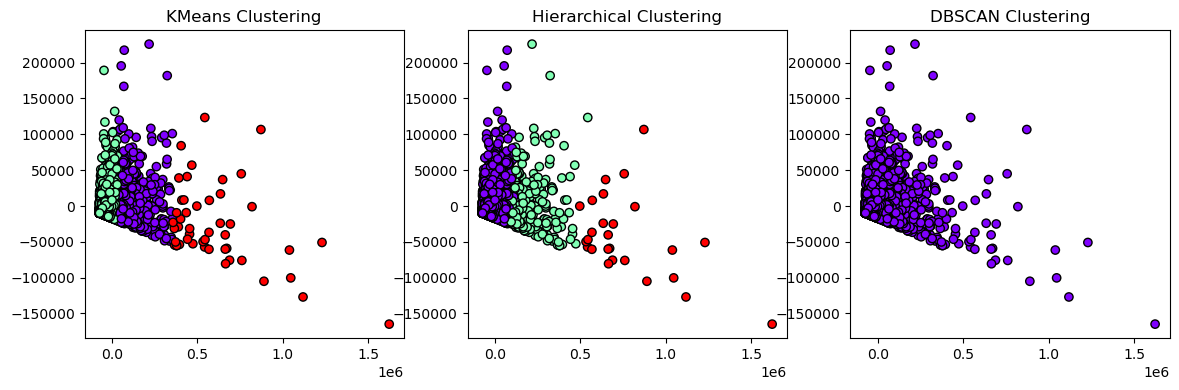

In [32]:
plt.figure(figsize=(14,4))

# kmeans
plt.subplot(1,3,1)
plt.scatter(X[:,0],X[:,1],c=kmeans_labels,cmap='rainbow',edgecolor='black')
plt.title('KMeans Clustering')

# hierarchical
plt.subplot(1,3,2)
plt.scatter(X[:,0],X[:,1],c=hier_labels,cmap='rainbow',edgecolor='black')
plt.title('Hierarchical Clustering')

# dbscan
plt.subplot(1,3,3)
plt.scatter(X[:,0],X[:,1],c=dbscan_labels,cmap='rainbow',edgecolor='black')
plt.title('DBSCAN Clustering')

plt.show()